## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
db = pd.read_csv('bmw_pricing_challenge.csv')
db.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [3]:
print("Number of rows:",db.shape[0])
print("Number of Columns:",db.shape[1])

Number of rows: 4843
Number of Columns: 18


In [4]:
print("Data Types :\n")
db.dtypes

Data Types :



maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [5]:
num = db.select_dtypes(include=np.number)
cat = db.select_dtypes(include=np.object)
bol = db.select_dtypes(include=np.bool)
print("Number of Numerical Features :",len(num.columns))
print("Number of Catigorical Features :",len(cat.columns))
print("Number of Boolean Features :",len(bol.columns))

Number of Numerical Features : 3
Number of Catigorical Features : 7
Number of Boolean Features : 8


### Missing Values

In [6]:
db.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

> No missing Values

<AxesSubplot:>

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


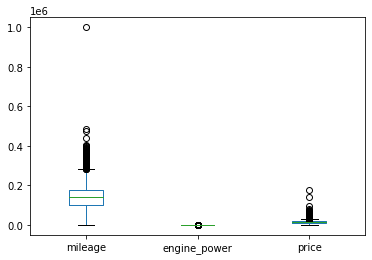

In [7]:
display(num.plot(kind='box'),db.describe())

>We see that the range of price variable is pretty large but most of the cars sold lie between 10,000 to 19000 price range 
#The minimum value  of mileage does not makes sense .Inter quartile for mileage is 100,000 to 175,000

>In engine we have sold cars having no engine to have 423HP cars 

### Check DataType

In [8]:
db['registration_date']=pd.to_datetime(db['registration_date'])
db['sold_at']=pd.to_datetime(db['sold_at'])

In [9]:
db.dtypes

maker_key                    object
model_key                    object
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                         object
paint_color                  object
car_type                     object
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
dtype: object

### Incorrect Value

> Mileage value for 2938 record is in negative

In [10]:
db[db['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


In [11]:
db.iloc[2938:2939]['mileage']=64

<ipython-input-11-a47f59e2c0b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.iloc[2938:2939]['mileage']=64


In [12]:
db[db['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at


## Exploratory Data Analysis

#### Count of Cars under Different Fuel Category

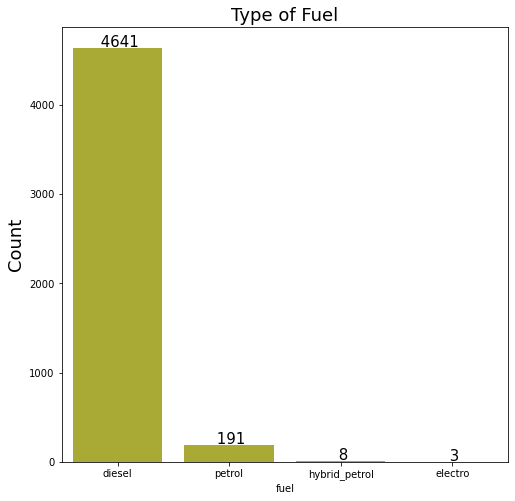

In [13]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=db, x='fuel',color=base_color)
plt.title('Type of Fuel',fontsize=18)
plt.ylabel('Count',fontsize=18)

locs, labels = plt.xticks()

for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = db['fuel'].value_counts()[label.get_text()]
    pct_string = '{: }'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=15)

#### Fuel Distribution with respect to price

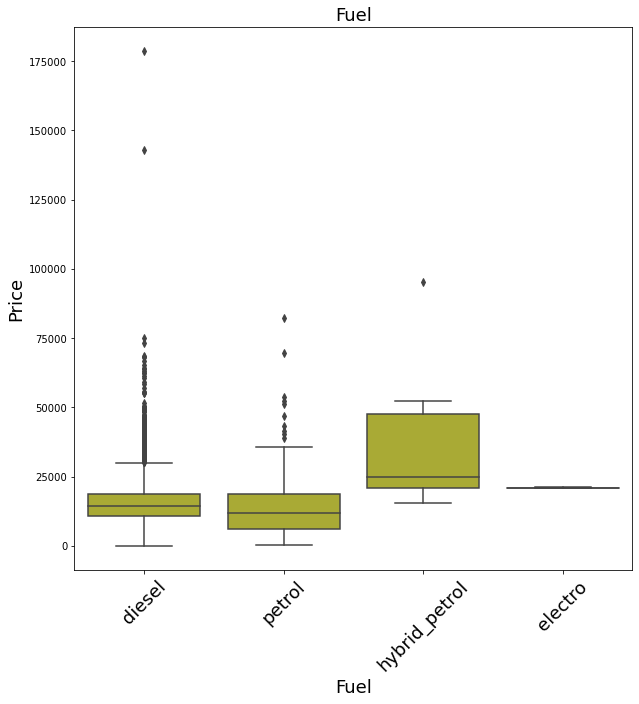

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data=db,x='fuel',y='price',color=base_color,order=db.fuel.value_counts().index);
plt.title('Fuel',fontsize=18)
plt.ylabel('Price',fontsize=18);
plt.xlabel('Fuel',fontsize=18);
plt.xticks(fontsize=18,rotation=45);

> Even though the diesel car are more in number we see that hybrid_Petrol sell at a higher price followed by diesel

#### Count of Cars under Different Color's Category

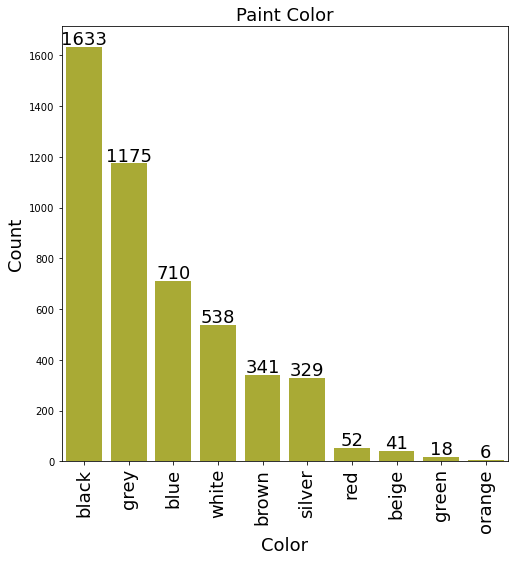

In [15]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=db, x='paint_color',color=base_color,order=db.paint_color.value_counts().index)
plt.title('Paint Color',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xlabel('Color',fontsize=18)
plt.xticks(rotation=90,fontsize=18)

locs, labels = plt.xticks()


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = db['paint_color'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=18)

> Not all paint colors are equally distributed in the dataset

#### Color Distribution with respect to price

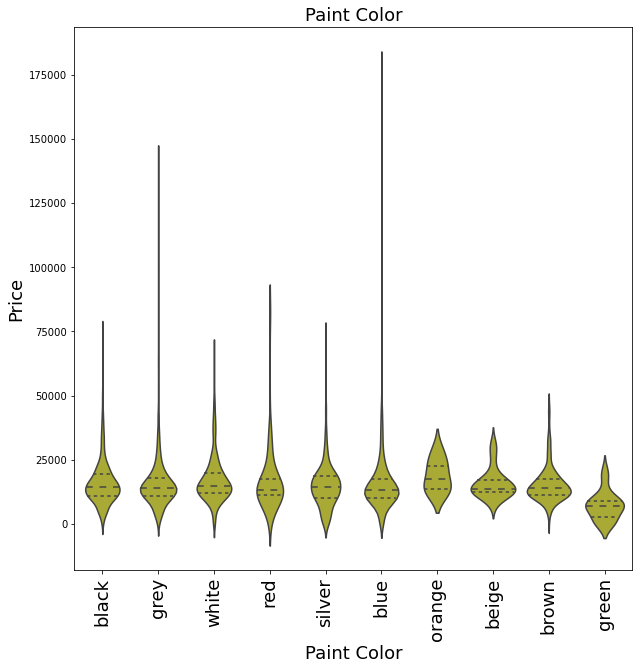

In [16]:
plt.figure(figsize=(10,10));
sns.violinplot(data=db,x='paint_color',y='price',inner='quartile',color=base_color);
plt.ylabel('Price',fontsize=18);
plt.xlabel('Paint Color',fontsize=18);
plt.title("Paint Color",fontsize=18);
plt.xticks(rotation=90,fontsize=18);

> The data is has more points for black , grey and blue

>We see that color is not a big factor in determining the final price of the BMW sold . As first six plot on the above graph show almost the same quartile ranges. So while fitting a neural network model I will drop the feature from the dataset

#### Count of Cars under Different Car Type

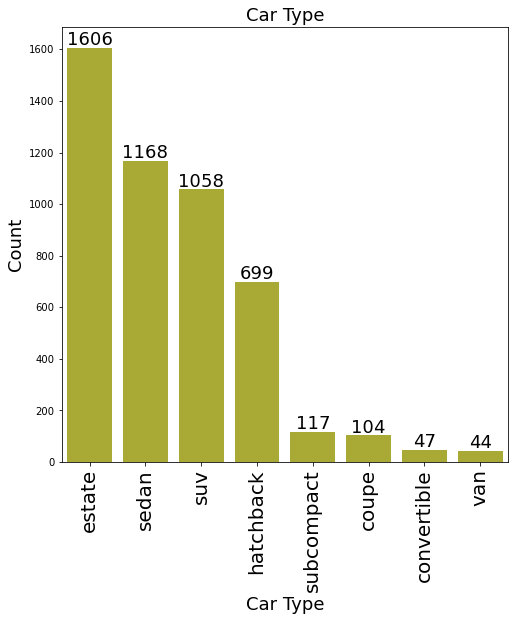

In [17]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=db, x='car_type',color=base_color,order=db.car_type.value_counts().index)
plt.title('Car Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xlabel('Car Type',fontsize=18)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = db['car_type'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=18)

#### Car Type Distribution with respect to price

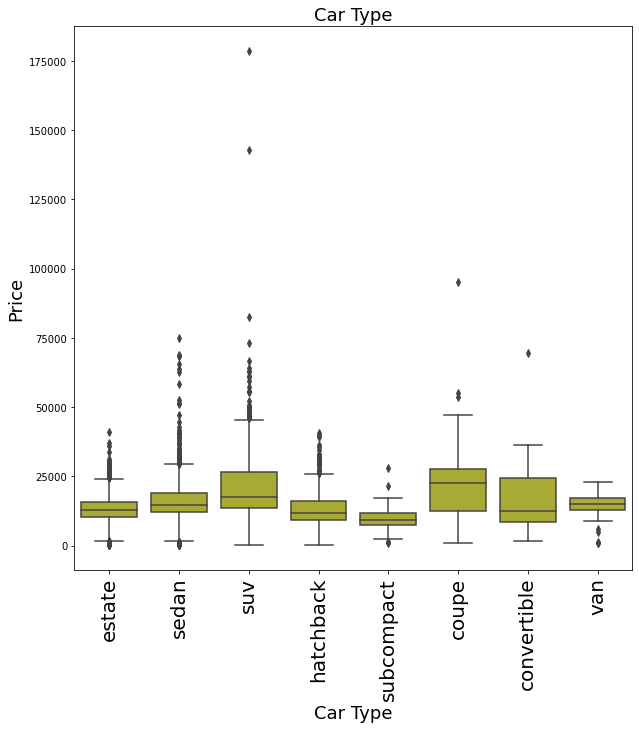

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=db,x='car_type',y='price',color=base_color,order=db.car_type.value_counts().index);
plt.title('Car Type',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xlabel('Car Type',fontsize=18)
plt.xticks(fontsize=20,rotation=90);

> We see that SUV and coupe show higher median price over other types

### Feature Engineering

In [19]:
#Creating a colum called as registration year 
db['registration_year']=db['registration_date'].dt.year

#### Distribution of Cars with respect to Year

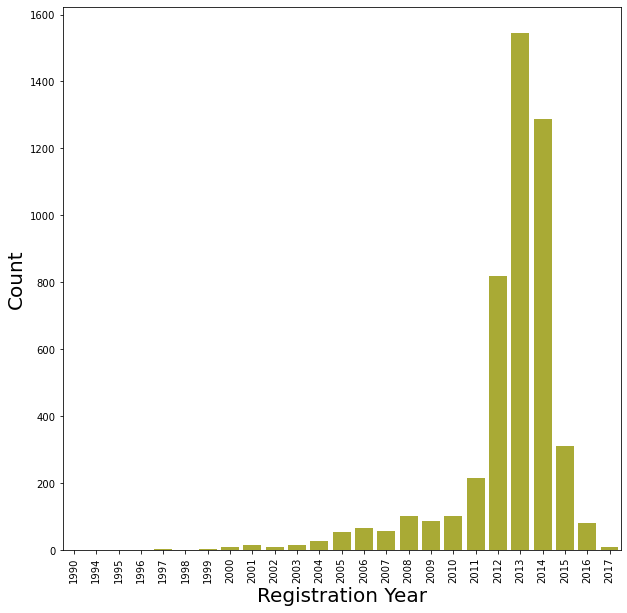

In [20]:
plt.figure(figsize=(10,10));
sns.countplot(data=db,x='registration_year',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Registration Year',fontsize=20);
plt.ylabel('Count',fontsize=20);

In [21]:
db['sold_at'].dt.year.value_counts()

2018    4843
Name: sold_at, dtype: int64

> We can see there is only one year for the sold at columns

#### Change in Price with respect to year

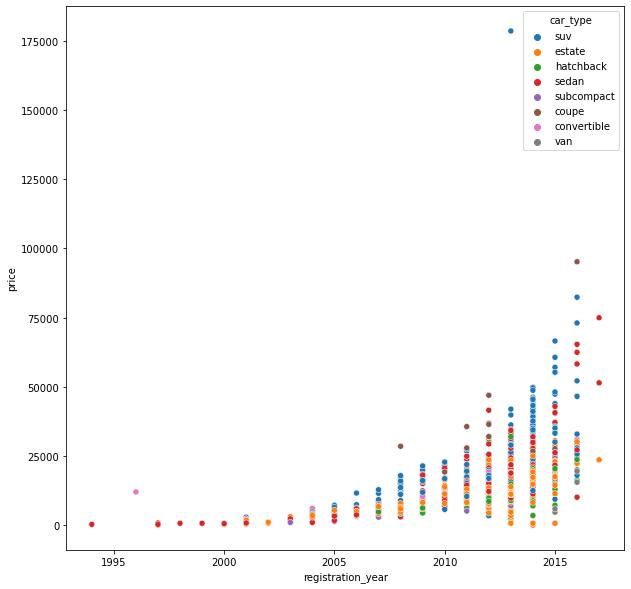

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=db.sample(2000),x='registration_year',y='price',hue='car_type');

In [23]:
db.corr()['registration_year']['price']*100

44.987810811433185

> We can see mostly a positive corelation between the year and price

In [24]:
db['vechile_days']=db['sold_at']-db['registration_date']
db['year_diff']=db['sold_at'].dt.year-db['registration_year']

#### Count of BMW Models

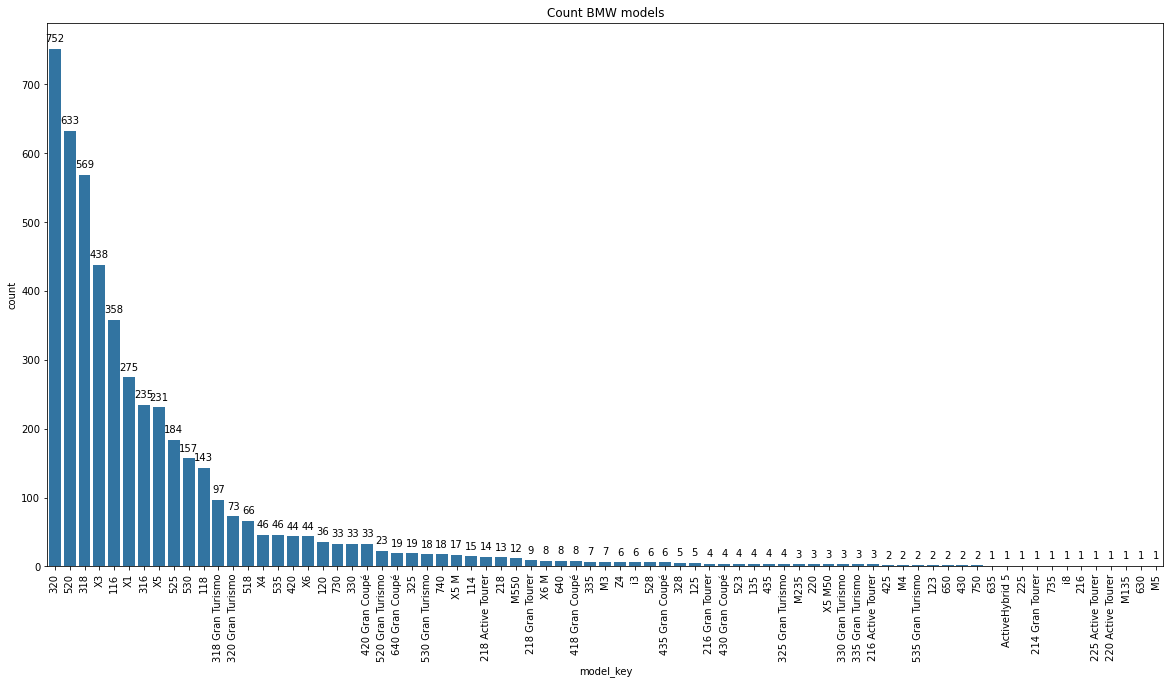

In [25]:
plt.figure(figsize=(20,10))
color=sns.color_palette()[0]
sns.countplot(data=db,x='model_key',color=color,order=db.model_key.value_counts().index);
plt.xticks(rotation=90);
plt.title('Count BMW models');

locs, labels = plt.xticks() # get the current tick locations and labels

# add annotations


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = db.model_key.value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black')

> We can see that most car sold are 3 series like ( 320,318,X3,318) followed by 5 series

#### Distribution of Engine Capacity

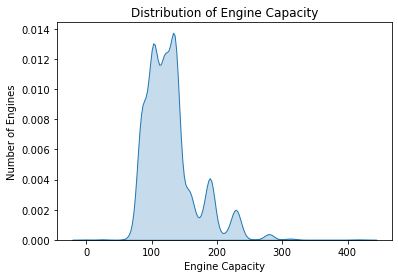

In [26]:
sns.kdeplot(data=db,x='engine_power',shade=True);
plt.xlabel('Engine Capacity');
plt.title('Distribution of Engine Capacity');
plt.ylabel('Number of Engines');

> Most cars are between 100 and 150 HP

#### Distribution of Price

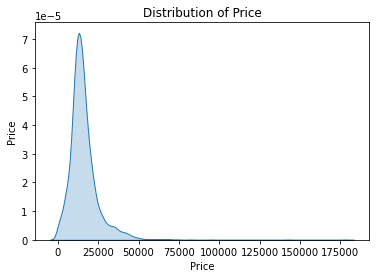

In [27]:
sns.kdeplot(data=db,x='price',shade=True);
plt.xlabel('Price');
plt.title('Distribution of Price');
plt.ylabel('Price');

#### Mileage Vs Price

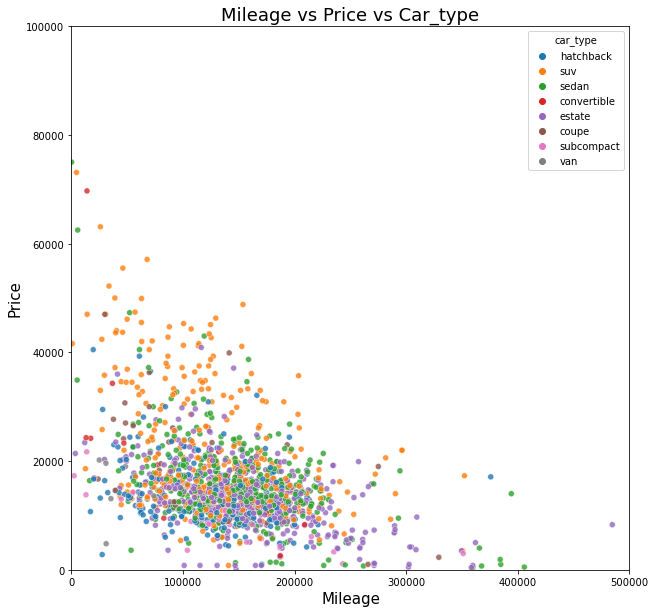

In [28]:
plt.figure(figsize=(10,10));
sns.scatterplot(data=db.sample(1500),x='mileage',y='price',alpha=0.8,hue='car_type');
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=15);
plt.ylabel('Price',fontsize=15);
plt.title('Mileage vs Price vs Car_type',fontsize=18);

> For similar mileage we see that SUV command higher price and hatchbacks among the lowest

#### Mileage Vs Price Vs Year

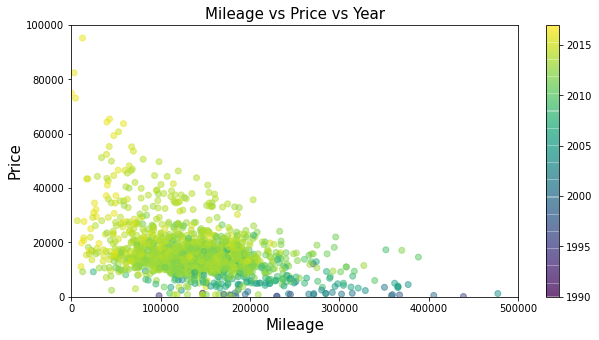

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(data = db.sample(1500), x = 'mileage', y = 'price', c = 'registration_year',cmap='viridis',alpha=0.5)
plt.colorbar();
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=15);
plt.ylabel('Price',fontsize=15);
plt.title('Mileage vs Price vs Year',fontsize=15);

> As expected newer cars have low mileage and hence a higher prices . Also By removing the xlim we see that there are very few model which are above 500,000 mileage and 100000 price range so I am thinking of removing them from the prediction model

#### HeatMap

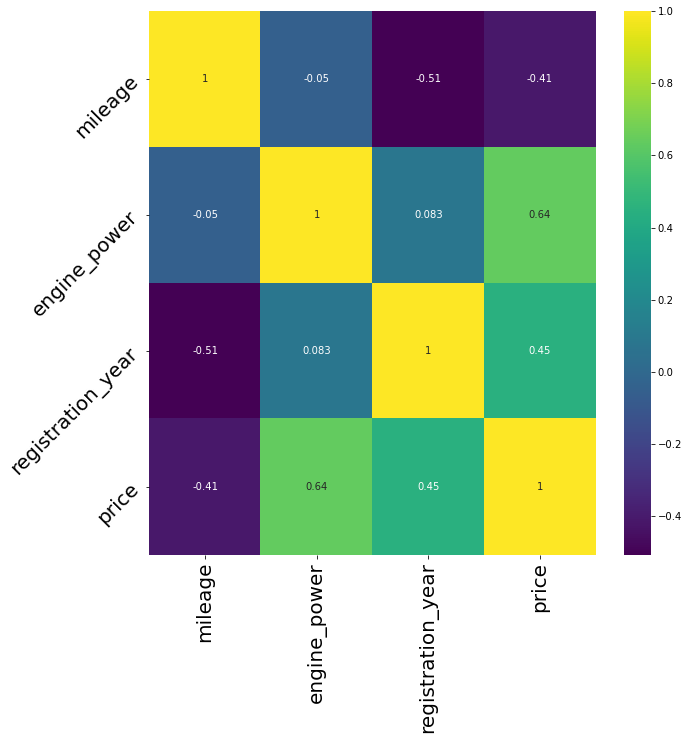

In [30]:
plt.figure(figsize=(10,10))
var=['mileage','engine_power','registration_year','price']
sns.heatmap(db[var].corr(),annot=True,cmap='viridis');
plt.xticks(fontsize=20,rotation=90);
plt.yticks(fontsize=20,rotation=45);

### Modelling

In [31]:
y = db['price']
x = db.drop(['price', 'maker_key'], axis=1)

In [32]:
x.drop(['car_type', 'paint_color'], axis=1, inplace=True)

In [33]:
x.drop(['registration_date', 'sold_at'], axis=1, inplace=True)

In [34]:
x.drop(['vechile_days'], axis=1, inplace=True)

In [35]:
x.drop(['year_diff'], axis=1, inplace=True)

In [36]:
model_key = {key: i for i, key in enumerate(x['model_key'].unique())}
x['model_key'] = x['model_key'].map(model_key)

fuel = {key: i for i, key in enumerate(x['fuel'].unique())}
x['fuel'] = x['fuel'].map(fuel)

In [37]:
for feature in 'feature_1 feature_2 feature_3 feature_4 feature_5 feature_6 feature_7 feature_8'.split():
    x[feature] = pd.get_dummies(x[feature], drop_first=True)

In [38]:
x.head()

,model_key,mileage,engine_power,fuel,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,registration_year
0,0,140411,100,0,1,1,0,0,1,1,1,0,2012
1,1,13929,317,1,1,1,0,0,0,1,1,1,2016
2,2,183297,120,0,0,0,0,0,1,0,1,0,2012
3,3,128035,135,0,1,1,0,0,1,1,1,1,2014
4,4,97097,160,0,1,1,0,0,0,1,1,1,2014


#### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [40]:
params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30],
    'n_estimators': [1, 5, 10, 50, 100, 150, 200, 250, 300, 350, 400, 500, 1000, 2000],
    'max_leaf_nodes': [5, 10, 15, 20, 30, 40, 50, 55, 60, 70, 80, 85, 90, 95, 100],
    'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 35, 40]
}

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
randomizedCV = RandomizedSearchCV(model, param_distributions=params, cv=5, verbose=3)
randomizedCV.fit(x, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=5, max_leaf_nodes=90, n_estimators=5, random_state=40;, score=0.532 total time=   0.1s
[CV 2/5] END max_depth=5, max_leaf_nodes=90, n_estimators=5, random_state=40;, score=0.653 total time=   0.7s
[CV 3/5] END max_depth=5, max_leaf_nodes=90, n_estimators=5, random_state=40;, score=0.766 total time=   0.2s
[CV 4/5] END max_depth=5, max_leaf_nodes=90, n_estimators=5, random_state=40;, score=0.800 total time=   0.2s
[CV 5/5] END max_depth=5, max_leaf_nodes=90, n_estimators=5, random_state=40;, score=0.494 total time=   0.6s
[CV 1/5] END max_depth=7, max_leaf_nodes=20, n_estimators=5, random_state=40;, score=0.506 total time=   0.3s
[CV 2/5] END max_depth=7, max_leaf_nodes=20, n_estimators=5, random_state=40;, score=0.535 total time=   0.1s
[CV 3/5] END max_depth=7, max_leaf_nodes=20, n_estimators=5, random_state=40;, score=0.745 total time=   0.2s
[CV 4/5] END max_depth=7, max_leaf_nodes=20, n_estimators=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 15, 20, 25, 30],
                                        'max_leaf_nodes': [5, 10, 15, 20, 30,
                                                           40, 50, 55, 60, 70,
                                                           80, 85, 90, 95,
                                                           100],
                                        'n_estimators': [1, 5, 10, 50, 100, 150,
                                                         200, 250, 300, 350,
                                                         400, 500, 1000, 2000],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 12, 15, 20, 30,
                                                         35, 40]},
                   ve

In [42]:
randomizedCV.best_estimator_

RandomForestRegressor(max_depth=15, max_leaf_nodes=90, n_estimators=2000,
                      random_state=7)

In [43]:
x.head()

,model_key,mileage,engine_power,fuel,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,registration_year
0,0,140411,100,0,1,1,0,0,1,1,1,0,2012
1,1,13929,317,1,1,1,0,0,0,1,1,1,2016
2,2,183297,120,0,0,0,0,0,1,0,1,0,2012
3,3,128035,135,0,1,1,0,0,1,1,1,1,2014
4,4,97097,160,0,1,1,0,0,0,1,1,1,2014


In [44]:


model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=70,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=7, verbose=0,
                      warm_start=False)
model.fit(x, y)
model.score(x_test, y_test)



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.8961141860062033

In [45]:
pd.DataFrame({'Train Score':[model.score(x_train,y_train)],'Test Score':[model.score(x_test, y_test)]})

,Train Score,Test Score
0,0.884848,0.896114


### Deployment

In [46]:
import gradio as gr

In [47]:
def price(model_key,mileage,engine_power,fuel,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7
         ,feature_8,regestration_year):
    
    values = model_key,mileage,engine_power,fuel,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,regestration_year
    
    prediction = int(model.predict(np.array(values).reshape(1,-1)))
    return prediction


iface = gr.Interface(fn=price,inputs=['number','number','number','number','number', 'number','number','number','number','number',
 'number','number','number'], outputs=['number'],theme='darkhuggingface',title='-BMW CAR PRICING-',height=100)
                    
iface.launch()

IMPORTANT: You are using gradio version 2.4.1, however version 2.5.1 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

## Analysis

#### How much impact does each of features have on the estimate value of the car?




>It very difficult to assign value of each individual feature but from the Model 1 ANN which takes into account the 8 boolean feature we where able to explain only 40% of the variance in price. But the current model (Model 2) can capture 83% of variance in the model .So it would be safe to conclude that the 8 unknown boolean features can explain ~40% variation in price

#### Patternin Data


>Diesel was the most common type of fuel in the cars which where sold

>Even though the diesel car are more in number we see that hybrid_Petrol sell at a higher price followed by diesel

>We see that color is not a big factor in determining the final price of the BMW sold .

>Estate cars are more in numbers in the data set followed by Sedan . Looking the car type I feel this data might be collected in EMEA (Europe) region

>We see that SUV and coupe show higher median price over other types of cars

>Most cars where purchased in 2013 and 2014 and sold/acutioned off in 2018

>SUV command a higher price in each year

>Most cars have engine between 100 and 150 HP.Overall engine range is from 0-450HP

>For a similar mileage value SUV command a higher price over other models

>We see that the range of price variable is pretty large but most of the cars sold lie between 10,000 to 19000 price range

>Inter quartile for mileage is 100,000 to 175,000

>Sedans where most earlier car registered followed by estats and SUV but of late not many sedans are being registered
